In [29]:
import pandas as pd

In [20]:
customer_df =pd.read_csv("C:/Users/localadmin/Desktop/customers_data.csv")
sales_df = pd.read_csv("C:/Users/localadmin/Desktop/sales_data-2 (1).csv")

In [36]:
customer_df.head()

,Name,Age,Gender,Location,Total_Spent,Customer_ID
0,Rebecca Clark,29,Female,Miami,102,6294
1,Gerald Long,46,Female,Los Angeles,4578,39139
2,Melissa Fitzgerald,50,Female,Houston,1311,45600
3,Hannah Santana,24,Female,Los Angeles,497,58198
4,Michael Olson,56,Male,New York,283,64398


In [25]:
sales_df.head()

,Transaction_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price,Total_Amount,Payment_Method,Cleaned_ID
0,f3daa723,01-01-24,0583d6,Clothing,Sofa,4,412,1648,Credit Card,0583d6
1,9e5061b5,1/1/24 1:00,4c0f1b,Home Decor,Novel,3,201,603,Cash,4c0f1b
2,a5da9276,1/1/24 2:00,00b49a,Home Decor,T-Shirt,1,480,480,Credit Card,00b49a
3,b72e138c,1/1/24 3:00,e093b6,Books,Laptop,2,16,32,Credit Card,e093b6
4,c6010e46,1/1/24 4:00,7c817c,Home Decor,Laptop,4,342,1368,Debit Card,7c817c


In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1000 non-null   object
 1   Age          1000 non-null   int64 
 2   Gender       1000 non-null   object
 3   Location     1000 non-null   object
 4   Total_Spent  1000 non-null   int64 
 5   Customer_ID  1000 non-null   object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [8]:
customer_df.describe()

,Age,Total_Spent
count,1000.00000,1000.000000
mean,43.57200,2558.625000
std,14.88329,1438.654573
min,18.00000,101.000000
25%,31.00000,1255.750000
50%,43.00000,2536.000000
75%,56.00000,3840.250000
max,69.00000,4996.000000


In [9]:
customer_df.columns

Index(['Customer_ID', 'Name', 'Age', 'Gender', 'Location', 'Total_Spent'], dtype='object')

In [30]:
customer_df.isnull().sum()

Name           0
Age            0
Gender         0
Location       0
Total_Spent    0
Customer_ID    0
Cleaned_ID     0
dtype: int64

In [12]:
customer_df['Name'] = customer_df['Name'].str.strip().str.title()
customer_df['Gender'] = customer_df['Gender'].str.strip().str.capitalize()
customer_df['Location'] = customer_df['Location'].str.strip().str.title()

In [ ]:
import pandas as pd


def clean_customer_id(id_str):
    try:
    
        num = float(id_str)
        
        num_str = str(int(num)) if num < 1e18 else str(int(num))[0:18] 
        return num_str[-5:]  
    except (ValueError, OverflowError, TypeError):
        
        return str(id_str)


customer_df['Cleaned_ID'] = customer_df['Customer_ID'].apply(clean_customer_id)


print(customer_df.head())



                 Name  Age  Gender     Location  Total_Spent Customer_ID  \
0       Rebecca Clark   29  Female        Miami          102        6294   
1         Gerald Long   46  Female  Los Angeles         4578       39139   
2  Melissa Fitzgerald   50  Female      Houston         1311    4.56E+04   
3      Hannah Santana   24  Female  Los Angeles          497       58198   
4       Michael Olson   56    Male     New York          283       64398   

  Cleaned_ID  
0       6294  
1      39139  
2      45600  
3      58198  
4      64398  


In [ ]:
import pandas as pd



def clean_customer_id(id_str):
    try:
        
        num = float(id_str)
        
        num_str = str(int(num)) if num < 1e18 else str(int(num))[0:18] 
        return num_str[-5:] 
    except (ValueError, OverflowError, TypeError):
       
        return str(id_str)


sales_df['Cleaned_ID'] = sales_df['Customer_ID'].apply(clean_customer_id)


print(sales_df.head())



In [ ]:
customer_df.drop('Customer_ID',axis=1,inplace=True)

In [37]:
sales_df.drop('Customer_ID',axis=1,inplace=True)

In [35]:

customer_df = customer_df.rename(columns={'Cleaned_ID': 'Customer_ID'})

In [38]:
sales_df.rename(columns={'Cleaned_ID':'Customer_ID'},inplace=True)

In [9]:
customer_df.duplicated().count()

np.int64(1000)

In [40]:
sales_df.head()

,Transaction_ID,Date,Product_Category,Product_Name,Quantity,Unit_Price,Total_Amount,Payment_Method,Customer_ID
0,f3daa723,2024-01-01 00:00:00,Clothing,Sofa,4,412,1648,Credit Card,0583d6
1,9e5061b5,2024-01-01 01:00:00,Home Decor,Novel,3,201,603,Cash,4c0f1b
2,a5da9276,2024-01-01 02:00:00,Home Decor,T-Shirt,1,480,480,Credit Card,00b49a
3,b72e138c,2024-01-01 03:00:00,Books,Laptop,2,16,32,Credit Card,e093b6
4,c6010e46,2024-01-01 04:00:00,Home Decor,Laptop,4,342,1368,Debit Card,7c817c


In [18]:
sales_df.isnull().sum()

Transaction_ID      0
Date                0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price          0
Total_Amount        0
Payment_Method      0
dtype: int64

In [41]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    2500 non-null   object        
 1   Date              2500 non-null   datetime64[ns]
 2   Product_Category  2500 non-null   object        
 3   Product_Name      2500 non-null   object        
 4   Quantity          2500 non-null   int64         
 5   Unit_Price        2500 non-null   int64         
 6   Total_Amount      2500 non-null   int64         
 7   Payment_Method    2500 non-null   object        
 8   Customer_ID       2500 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 175.9+ KB


In [42]:
sales_df["Date"] = pd.to_datetime(sales_df["Date"])

In [43]:
sales_df.head()

,Transaction_ID,Date,Product_Category,Product_Name,Quantity,Unit_Price,Total_Amount,Payment_Method,Customer_ID
0,f3daa723,2024-01-01 00:00:00,Clothing,Sofa,4,412,1648,Credit Card,0583d6
1,9e5061b5,2024-01-01 01:00:00,Home Decor,Novel,3,201,603,Cash,4c0f1b
2,a5da9276,2024-01-01 02:00:00,Home Decor,T-Shirt,1,480,480,Credit Card,00b49a
3,b72e138c,2024-01-01 03:00:00,Books,Laptop,2,16,32,Credit Card,e093b6
4,c6010e46,2024-01-01 04:00:00,Home Decor,Laptop,4,342,1368,Debit Card,7c817c


In [25]:
sales_df["Total_Amount1"]=(sales_df["Quantity"])*(sales_df["Unit_Price"])

In [28]:
sales_df.head()

,Transaction_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price,Total_Amount,Payment_Method,Cleaned_ID
0,f3daa723,2024-01-01 00:00:00,0583d6,Clothing,Sofa,4,412,1648,Credit Card,0583d6
1,9e5061b5,2024-01-01 01:00:00,4c0f1b,Home Decor,Novel,3,201,603,Cash,4c0f1b
2,a5da9276,2024-01-01 02:00:00,00b49a,Home Decor,T-Shirt,1,480,480,Credit Card,00b49a
3,b72e138c,2024-01-01 03:00:00,e093b6,Books,Laptop,2,16,32,Credit Card,e093b6
4,c6010e46,2024-01-01 04:00:00,7c817c,Home Decor,Laptop,4,342,1368,Debit Card,7c817c


In [28]:
sales_df["Disperency"]=(sales_df["Total_Amount"]) -(sales_df["Total_Amount1"])

In [29]:
sales_df["Disperency"] = sales_df["Disperency"]==0

In [30]:
sales_df.head()

,Transaction_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price,Total_Amount,Payment_Method,Total_Amount1,Disperency
0,f3daa723,2024-01-01 00:00:00,0583d6,Clothing,Sofa,4,412,1648,Credit Card,1648,True
1,9e5061b5,2024-01-01 01:00:00,4c0f1b,Home Decor,Novel,3,201,603,Cash,603,True
2,a5da9276,2024-01-01 02:00:00,00b49a,Home Decor,T-Shirt,1,480,480,Credit Card,480,True
3,b72e138c,2024-01-01 03:00:00,e093b6,Books,Laptop,2,16,32,Credit Card,32,True
4,c6010e46,2024-01-01 04:00:00,7c817c,Home Decor,Laptop,4,342,1368,Debit Card,1368,True


In [33]:
(sales_df["Disperency"]==False).sum()

np.int64(0)

In [44]:
sales_df["Year"]=sales_df["Date"].dt.year

In [45]:
sales_df["Month"]=sales_df["Date"].dt.month

In [46]:
sales_df["Date_Number"]=sales_df["Date"].dt.date

In [50]:
#sales_df["Day"]=sales_df["Date"].dt.days_in_month
#sales_df.drop("Day" ,axis=1)
sales_df.head()

,Transaction_ID,Date,Product_Category,Product_Name,Quantity,Unit_Price,Total_Amount,Payment_Method,Customer_ID,Year,Month,Date_Number
0,f3daa723,2024-01-01 00:00:00,Clothing,Sofa,4,412,1648,Credit Card,0583d6,2024,1,2024-01-01
1,9e5061b5,2024-01-01 01:00:00,Home Decor,Novel,3,201,603,Cash,4c0f1b,2024,1,2024-01-01
2,a5da9276,2024-01-01 02:00:00,Home Decor,T-Shirt,1,480,480,Credit Card,00b49a,2024,1,2024-01-01
3,b72e138c,2024-01-01 03:00:00,Books,Laptop,2,16,32,Credit Card,e093b6,2024,1,2024-01-01
4,c6010e46,2024-01-01 04:00:00,Home Decor,Laptop,4,342,1368,Debit Card,7c817c,2024,1,2024-01-01


In [41]:
sales_df.head()

,Transaction_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price,Total_Amount,Payment_Method,Total_Amount1,Disperency,Year,Month,Date_Number,Day
0,f3daa723,2024-01-01 00:00:00,0583d6,Clothing,Sofa,4,412,1648,Credit Card,1648,True,2024,1,2024-01-01,0
1,9e5061b5,2024-01-01 01:00:00,4c0f1b,Home Decor,Novel,3,201,603,Cash,603,True,2024,1,2024-01-01,0
2,a5da9276,2024-01-01 02:00:00,00b49a,Home Decor,T-Shirt,1,480,480,Credit Card,480,True,2024,1,2024-01-01,0
3,b72e138c,2024-01-01 03:00:00,e093b6,Books,Laptop,2,16,32,Credit Card,32,True,2024,1,2024-01-01,0
4,c6010e46,2024-01-01 04:00:00,7c817c,Home Decor,Laptop,4,342,1368,Debit Card,1368,True,2024,1,2024-01-01,0


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

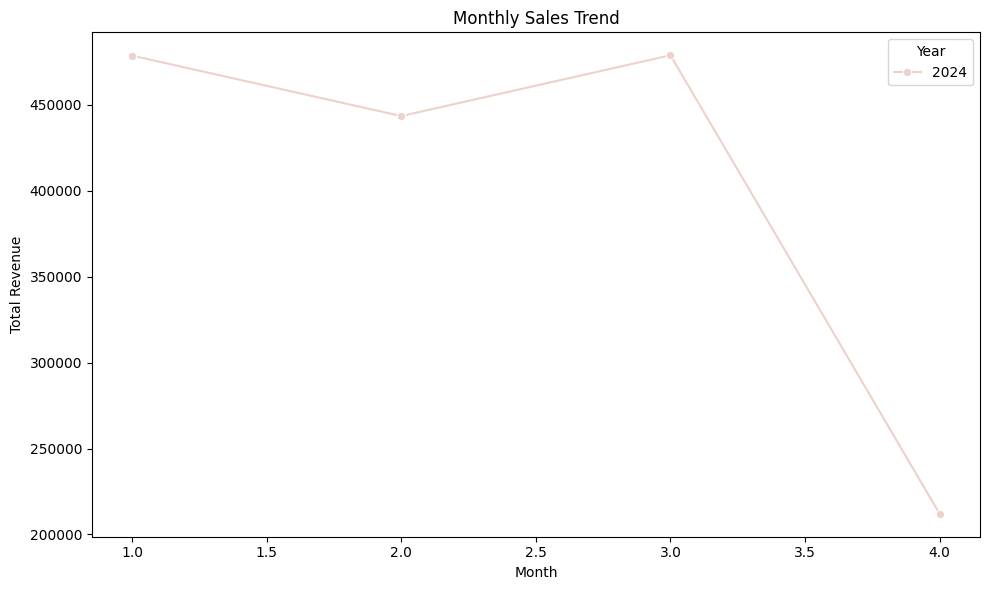

In [54]:
monthly_sales = sales_df.groupby(['Year', 'Month'])['Total_Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Amount', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [55]:
monthly_sales=sales_df.groupby(['Year','Month'])['Total_Amount'].sum().reset_index()
monthly_sales

,Year,Month,Total_Amount
0,2024,1,478627
1,2024,2,443457
2,2024,3,478836
3,2024,4,212020


In [56]:
total_Revenue =sales_df["Total_Amount"].sum()
total_Revenue

np.int64(1612940)

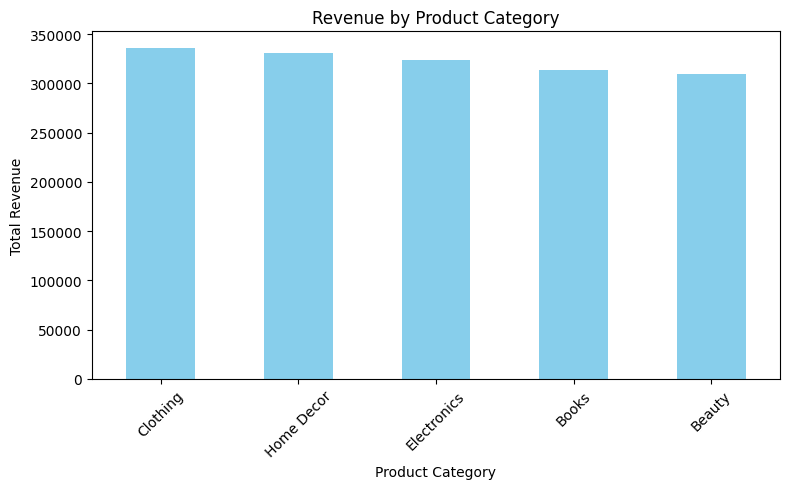

In [57]:
category_sales = sales_df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

def create_mysql_engine(user, password, host, database):
    safe_password = quote_plus(password)
    connection_string = f'mysql+pymysql://{user}:{safe_password}@{host}/{database}'
    return create_engine(connection_string)  


engine = create_mysql_engine('root', 'Deloitte@123', 'localhost', 'sales_revenue')


customer_df.to_sql("Customers", con=engine, if_exists='replace', index=False)
sales_df.to_sql("Sales", con=engine, if_exists='replace', index=False)

C:\Users\localadmin\AppData\Local\Temp\ipykernel_8960\3185713851.py:13: UserWarning: The provided table name 'Customers' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  customer_df.to_sql("Customers", con=engine, if_exists='replace', index=False)
C:\Users\localadmin\AppData\Local\Temp\ipykernel_8960\3185713851.py:14: UserWarning: The provided table name 'Sales' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  sales_df.to_sql("Sales", con=engine, if_exists='replace', index=False)


2500